In [1]:
from config import *

from utils.db_connection import create_connection, query_data, query_sql_file, select_table
from src.data import process_patients, process_diagnoses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect to the MIMIC-III database
con = create_connection()

In [4]:
patient_data = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'patient_stay_data.csv'))
patient_data.head()

,subject_id,hadm_id,admission_type,admission_location,ethnicity,hospital_expire_flag,total_los,gender,expire_flag,age_at_admission,...,Diseases Of The Genitourinary System,Complications Of Pregnancy Childbirth And The Puerperium,Diseases Of The Skin And Subcutaneous Tissue,Diseases Of The Musculoskeletal System And Connective Tissue,Congenital Anomalies,Certain Conditions Originating In The Perinatal Period,Symptoms Signs And Ill-Defined Conditions,Injury And Poisoning,Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services,Supplementary Classification Of External Causes Of Injury And Poisoning
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,WHITE,0,1.14,F,0,65,...,0,0,0,0,0,0,0,1,0,1
1,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,WHITE,0,5.50,M,0,71,...,1,0,0,0,0,0,0,0,1,0
2,23,124321,EMERGENCY,TRANSFER,WHITE,0,6.77,M,0,75,...,0,0,0,0,0,0,1,0,1,0
3,24,161859,EMERGENCY,TRANSFER,WHITE,0,2.86,M,0,39,...,0,0,0,0,0,0,0,0,0,0
4,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,WHITE,0,3.53,M,0,59,...,0,0,0,0,0,0,0,0,0,0


In [11]:
icd_categories = process_diagnoses.get_categories()
icd_categories
patient_data[list(icd_categories.keys())]

,Infectious And Parasitic Diseases,Neoplasms,Endocrine Nutritional And Metabolic Diseases And Immunity Disorders,Diseases Of The Blood And Blood-Forming Organs,Mental Disorders,Diseases Of The Nervous System And Sense Organs,Diseases Of The Circulatory System,Diseases Of The Respiratory System,Diseases Of The Digestive System,Diseases Of The Genitourinary System,Complications Of Pregnancy Childbirth And The Puerperium,Diseases Of The Skin And Subcutaneous Tissue,Diseases Of The Musculoskeletal System And Connective Tissue,Congenital Anomalies,Certain Conditions Originating In The Perinatal Period,Symptoms Signs And Ill-Defined Conditions,Injury And Poisoning,Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services,Supplementary Classification Of External Causes Of Injury And Poisoning
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62717,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
62718,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
62719,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,1
62720,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [13]:
# Melt the DataFrame to long format
melted_df = patient_data.melt(id_vars='first_careunit', value_vars=list(icd_categories.keys()))

# Only keep the rows where value is 1
melted_df = melted_df[melted_df['value'] == 1]

# Now we can use crosstab
cross_tab = pd.crosstab(melted_df['first_careunit'], melted_df['variable'])
cross_tab

variable,Certain Conditions Originating In The Perinatal Period,Complications Of Pregnancy Childbirth And The Puerperium,Congenital Anomalies,Diseases Of The Blood And Blood-Forming Organs,Diseases Of The Circulatory System,Diseases Of The Digestive System,Diseases Of The Genitourinary System,Diseases Of The Musculoskeletal System And Connective Tissue,Diseases Of The Nervous System And Sense Organs,Diseases Of The Respiratory System,Diseases Of The Skin And Subcutaneous Tissue,Endocrine Nutritional And Metabolic Diseases And Immunity Disorders,Infectious And Parasitic Diseases,Injury And Poisoning,Mental Disorders,Neoplasms,Supplementary Classification Of External Causes Of Injury And Poisoning,Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services,Symptoms Signs And Ill-Defined Conditions
first_careunit,,,,,,,,,,,,,,,,,,,
CCU,0,7,171,2557,7407,2550,3639,1293,1800,3570,710,5607,1597,2780,2107,702,1849,4102,2713
CSRU,0,2,708,2498,8966,2760,2791,1469,1824,3442,774,6733,1092,3709,1894,658,2230,4638,2015
MICU,1,135,506,10687,17156,10944,11775,4808,7175,12923,3236,15601,9004,8878,8156,4888,6401,11611,10163
NICU,5442,0,1455,30,169,272,37,46,253,89,204,106,133,58,8,59,26,7963,375
SICU,0,19,276,2729,7266,4090,3386,1832,3728,4064,989,5755,2545,4073,2816,2142,3096,4799,3631
TSICU,0,10,155,1727,4060,2071,1747,1195,2013,2675,562,3154,1274,4598,2293,907,4223,2538,1982


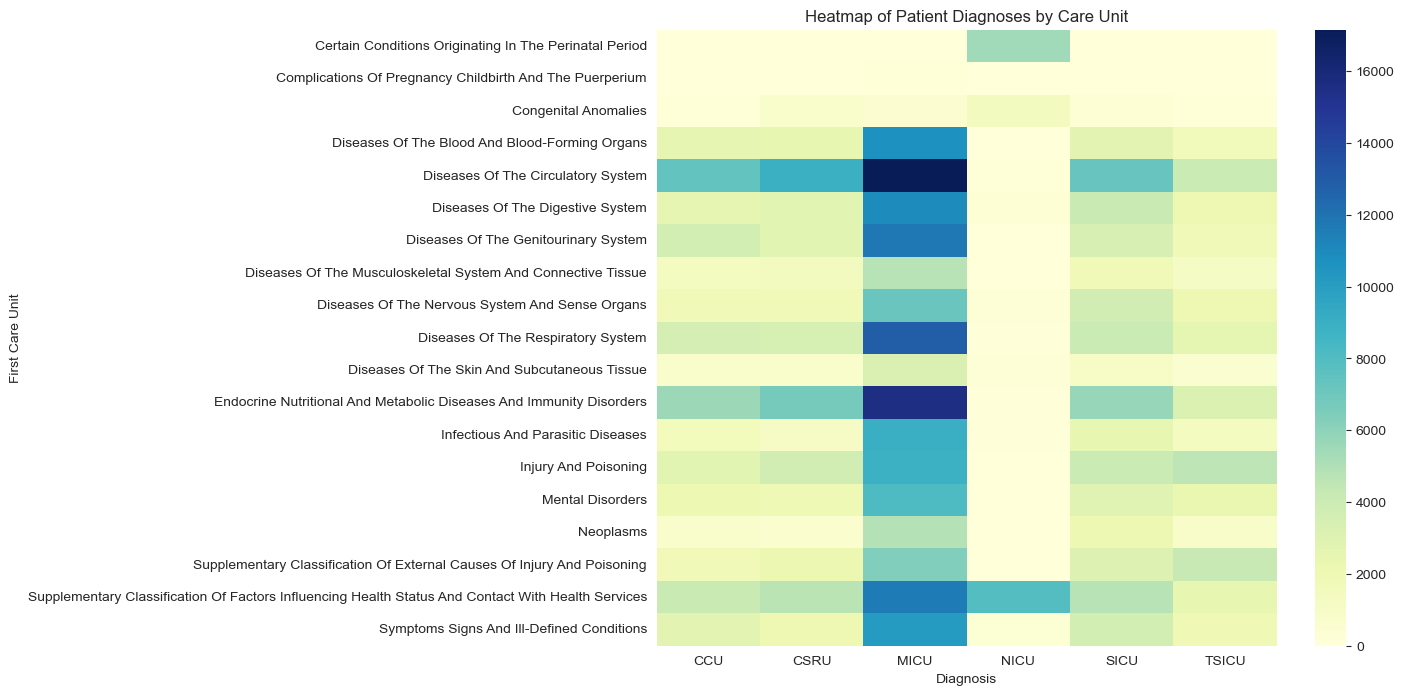

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(cross_tab.T, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap of Patient Diagnoses by Care Unit')
plt.xlabel('Diagnosis')
plt.ylabel('First Care Unit')
plt.show()